In [20]:
import joblib

loaded_model = joblib.load("../Analysis_and_Model/PM2.5predictor.pkl")

In [21]:
import pandas as pd

df = pd.read_csv("../Data/test_data.csv")

In [22]:
df

,Year,State,CO,NO2,O3,SO2,PM2.5
0,2016,Alabama,0.337158,11.547225,28.706667,1.081692,9.436674
1,2016,Arizona,0.334874,14.837061,33.312022,2.655121,6.810794
2,2016,Arkansas,0.296425,7.621050,28.825000,1.008650,9.043935
3,2016,California,0.325858,9.503550,30.596454,0.626877,9.611273
4,2016,Colorado,0.358489,11.945474,37.851099,1.394381,6.344656
...,...,...,...,...,...,...,...
379,2023,Virginia,0.268529,7.538555,29.867391,1.745232,8.074219
380,2023,Washington,0.256367,12.381411,27.970270,0.898613,7.701125
381,2023,West Virginia,0.247525,0.000000,26.370000,1.826565,9.747752
382,2023,Wisconsin,0.198063,9.101080,31.389516,0.513425,7.537519


In [23]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Select the columns with numeric data for PCA
numeric_columns_scale = ["CO", "NO2", "O3", "SO2"]

# Standardize the data (mean=0, std=1) for PCA
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df[numeric_columns_scale])
# Apply PCA with 3 components


In [24]:
df[numeric_columns_scale]

,CO,NO2,O3,SO2
0,0.337158,11.547225,28.706667,1.081692
1,0.334874,14.837061,33.312022,2.655121
2,0.296425,7.621050,28.825000,1.008650
3,0.325858,9.503550,30.596454,0.626877
4,0.358489,11.945474,37.851099,1.394381
...,...,...,...,...
379,0.268529,7.538555,29.867391,1.745232
380,0.256367,12.381411,27.970270,0.898613
381,0.247525,0.000000,26.370000,1.826565
382,0.198063,9.101080,31.389516,0.513425


In [25]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform(data_scaled)

# Create a DataFrame with the first 3 principal components
pca_df = pd.DataFrame(data=pca_result, columns=["PC1", "PC2", "PC3"])

# Add the 'State' column back
pca_df["State"] = df["State"]
pca_df["Year"] = df["Year"]

# Print the DataFrame with the first 3 principal components
print(pca_df)

          PC1       PC2       PC3          State  Year
0    1.291722 -0.635121  0.443811        Alabama  2016
1    3.197252  1.707163  2.584591        Arizona  2016
2    0.214035 -0.344309  0.566145       Arkansas  2016
3    0.678231 -0.355070 -0.499472     California  2016
4    2.413404  1.941080 -0.136629       Colorado  2016
..        ...       ...       ...            ...   ...
379  0.507559  0.632916  1.819979       Virginia  2023
380  0.541318 -0.584430  0.135302     Washington  2023
381 -1.174387  0.065896  2.932269  West Virginia  2023
382 -0.548612  0.431337 -0.781631      Wisconsin  2023
383 -1.086643  3.073084 -0.129890        Wyoming  2023

[384 rows x 5 columns]


In [26]:
pca_df = pd.get_dummies(pca_df, columns=["State"], prefix="State")
pca_df

,PC1,PC2,PC3,Year,State_Alabama,State_Arizona,State_Arkansas,State_California,State_Colorado,State_Connecticut,...,State_South Dakota,State_Tennessee,State_Texas,State_Utah,State_Vermont,State_Virginia,State_Washington,State_West Virginia,State_Wisconsin,State_Wyoming
0,1.291722,-0.635121,0.443811,2016,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,3.197252,1.707163,2.584591,2016,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,0.214035,-0.344309,0.566145,2016,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,0.678231,-0.355070,-0.499472,2016,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2.413404,1.941080,-0.136629,2016,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,0.507559,0.632916,1.819979,2023,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
380,0.541318,-0.584430,0.135302,2023,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
381,-1.174387,0.065896,2.932269,2023,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
382,-0.548612,0.431337,-0.781631,2023,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [27]:
predictions = loaded_model.predict(pca_df)

In [28]:
predictions

array([2.36784358, 1.57007206, 2.35293687, 2.10259952, 1.2914185 ,
       1.94700304, 2.20430463, 2.3486224 , 2.14906029, 1.71468248,
       2.35204318, 2.37967257, 2.44424526, 2.23787206, 2.41018454,
       2.41568635, 2.19619605, 2.1746396 , 2.1288288 , 2.10832013,
       2.32062945, 2.43535075, 2.28542254, 2.04867535, 2.19593987,
       1.31516543, 2.15199575, 2.06026926, 1.51347041, 2.08923095,
       2.30475812, 2.2514635 , 2.25158497, 2.22084092, 2.05367082,
       2.27460817, 1.91992538, 2.55215409, 2.11079648, 2.30137048,
       2.25598148, 1.57383339, 2.0979564 , 2.31693864, 1.97025775,
       2.50896946, 2.2730064 , 1.71411361, 2.47869991, 1.48141952,
       2.26576021, 2.06373258, 1.31318703, 1.99494876, 2.2302064 ,
       2.38612442, 2.28660136, 1.63176214, 2.32114263, 2.2596337 ,
       2.39675231, 2.27672172, 2.42901005, 2.40521976, 2.18364014,
       2.23493001, 2.14247136, 2.09586429, 2.23062028, 2.45238456,
       2.21813457, 1.97763648, 2.20354214, 1.30247541, 2.17082

In [30]:
import numpy as np

og = np.exp(predictions)
og

array([10.67434903,  4.80699455, 10.51640974,  8.18742565,  3.63794331,
        7.00765444,  9.06394662, 10.4711348 ,  8.57679487,  5.55491146,
       10.50701553, 10.80136559, 11.52185034,  9.37336413, 11.13601604,
       11.19745312,  8.99074797,  8.79901342,  8.40501705,  8.23439696,
       10.18208139, 11.41982348,  9.82983887,  7.75761819,  8.98844508,
        3.72536722,  8.60200872,  7.84808269,  4.5424677 ,  8.07869986,
       10.02175388,  9.50163132,  9.50278556,  9.21507679,  7.79646806,
        9.72410812,  6.82044951, 12.83472114,  8.25481344,  9.98786125,
        9.54465658,  4.82510929,  8.14949861, 10.14457054,  7.17252498,
       12.2922559 ,  9.70854477,  5.55175234, 11.92574979,  4.39918597,
        9.63844908,  7.87531026,  3.71800424,  7.35182628,  9.30178575,
       10.87127972,  9.84143332,  5.11287638, 10.18730798,  9.57957953,
       10.98743463,  9.74468223, 11.34764294, 11.08086517,  8.87856676,
        9.34582769,  8.52046875,  8.13246675,  9.30563639, 11.61

In [31]:
predicted_pm25 = pd.DataFrame()

In [32]:
predicted_pm25["State"] = df["State"]
predicted_pm25["Year"] = df["Year"]
predicted_pm25["PM2.5"] = og

In [33]:
predicted_pm25

,State,Year,PM2.5
0,Alabama,2016,10.674349
1,Arizona,2016,4.806995
2,Arkansas,2016,10.516410
3,California,2016,8.187426
4,Colorado,2016,3.637943
...,...,...,...
379,Virginia,2023,10.276799
380,Washington,2023,7.514569
381,West Virginia,2023,12.973531
382,Wisconsin,2023,9.529550


In [34]:
data_vis = predicted_pm25[predicted_pm25["Year"] == "2023"]

In [35]:
year_2023_rows = predicted_pm25[predicted_pm25["Year"] == 2023]
year_2023_rows.to_csv("predicted_2023_values.csv", index=False)

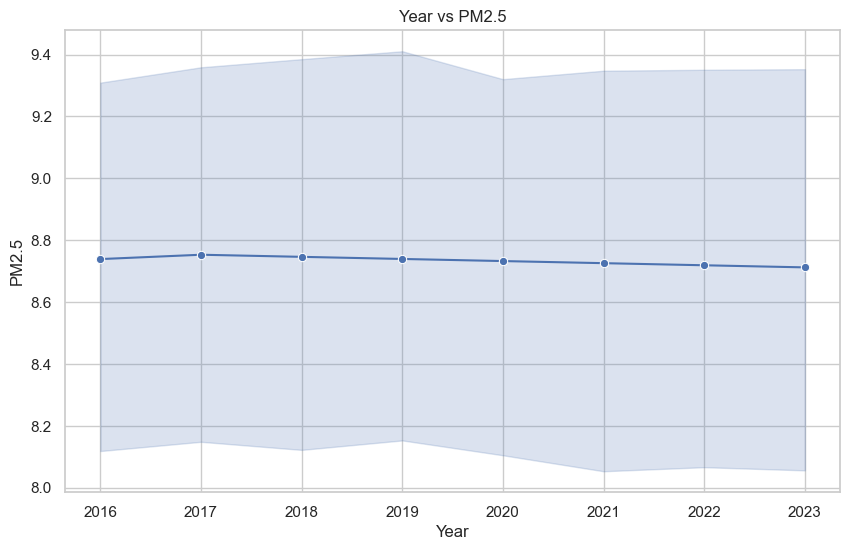

In [36]:
import seaborn as sns
sns.set(style="whitegrid")  # Set the style (optional)
plt.figure(figsize=(10, 6))  # Set the figure size (optional)
sns.lineplot(x='Year', y='PM2.5', data=predicted_pm25, marker='o')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('PM2.5')
plt.title('Year vs PM2.5')

# Show the plot
plt.show()


In [37]:
average_pm25_by_year = predicted_pm25.groupby('Year')['PM2.5'].mean()
average_pm25_by_year

Year
2016    8.739309
2017    8.753366
2018    8.746542
2019    8.739723
2020    8.732909
2021    8.726101
2022    8.719299
2023    8.712501
Name: PM2.5, dtype: float64

In [8]:
import json
import pandas as pd
# Specify the file path
file_path = "./ss.json"

# Open the JSON file for reading
with open(file_path, 'r') as json_file:
    # Load the JSON data from the file
    data = json.load(json_file)


df = pd.json_normalize(data)
df


,Data
0,"[{'state_code': '37', 'county_code': '021', 's..."
